In [2]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt 
import seaborn
import datetime

In [4]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.json"
data = requests.get(url).json()

for countries in data:
    if "continent" in data[countries]:
        print(data[countries]["continent"] + " " + str(data[countries]["location"]))

Asia Afghanistan
Europe Albania
Africa Algeria
Europe Andorra
Africa Angola
North America Anguilla
North America Antigua and Barbuda
South America Argentina
Asia Armenia
North America Aruba
Oceania Australia
Europe Austria
Asia Azerbaijan
North America Bahamas
Asia Bahrain
Asia Bangladesh
North America Barbados
Europe Belarus
Europe Belgium
North America Belize
Africa Benin
North America Bermuda
Asia Bhutan
South America Bolivia
North America Bonaire Sint Eustatius and Saba
Europe Bosnia and Herzegovina
Africa Botswana
South America Brazil
North America British Virgin Islands
Asia Brunei
Europe Bulgaria
Africa Burkina Faso
Africa Burundi
Asia Cambodia
Africa Cameroon
North America Canada
Africa Cape Verde
North America Cayman Islands
Africa Central African Republic
Africa Chad
South America Chile
Asia China
South America Colombia
Africa Comoros
Africa Congo
North America Costa Rica
Africa Cote d'Ivoire
Europe Croatia
North America Cuba
North America Curacao
Europe Cyprus
Europe Czech R

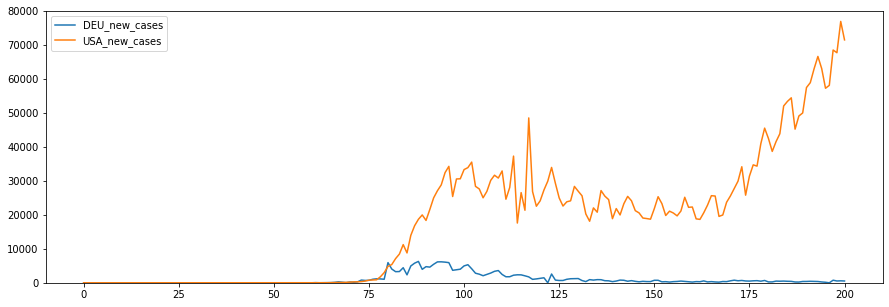

In [6]:
columns = ["date"]
dates = pd.date_range(start="31/12/2019", end=datetime.datetime.now().date())

covidPlot = pd.DataFrame(columns = columns)
usa_new_cases = []
for usa_data in data["USA"]["data"]:
        usa_new_cases.append(usa_data["new_cases"])

deu_new_cases = []
for deu_data in data["DEU"]["data"]:
        deu_new_cases.append(deu_data["new_cases"])

        
covidPlot["date"] = dates
covidPlot["USA_new_cases"] = usa_new_cases
covidPlot["DEU_new_cases"] = deu_new_cases
covidPlot.plot(ylim=[0, 80000], y=["DEU_new_cases", "USA_new_cases"],figsize=(15,5)) 

In [13]:
covidPlot.to_csv("test.csv")

In [28]:
columns = ["date", "Country", "new_cases"]
testPlot = pd.DataFrame(columns = columns)
testPlot["date"], testPlot["Country"], testPlot["new_cases"] = [dates, "DEU", deu_new_cases]

testPlotUSA = pd.DataFrame(columns = columns)
testPlotUSA["date"], testPlotUSA["Country"], testPlotUSA["new_cases"] = [dates, "USA", usa_new_cases]

chn_new_cases = []
for chn_data in data["CHN"]["data"]:
       chn_new_cases.append(chn_data["new_cases"])

testPlotCHN = pd.DataFrame(columns = columns)
testPlotCHN["date"], testPlotCHN["Country"], testPlotCHN["new_cases"] = [dates, "CHN", chn_new_cases]


newdata = testPlot.append(testPlotCHN, ignore_index=True)
newdata = newdata.append(testPlotUSA, ignore_index=True)
print(newdata)

date Country  new_cases
0   2019-12-31     DEU        0.0
1   2020-01-01     DEU        0.0
2   2020-01-02     DEU        0.0
3   2020-01-03     DEU        0.0
4   2020-01-04     DEU        0.0
..         ...     ...        ...
598 2020-07-14     USA    58114.0
599 2020-07-15     USA    68518.0
600 2020-07-16     USA    67717.0
601 2020-07-17     USA    76930.0
602 2020-07-18     USA    71494.0

[603 rows x 3 columns]


In [29]:
newdata.to_csv("test.csv")